In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Time_ESS_FOM_01 = np.load('./data/recorded_values/MDA_MF_FOM_ratio_01.npy')
Time_ESS_MDA_MF2step_h2_01 = np.load('./data/recorded_values/MDA_MF_2-step_h2_ratio_01.npy')
Time_ESS_MDA_MF1step_h2_01 = np.load('./data/recorded_values/MDA_MF_1-step_h2_ratio_01.npy')
Time_ESS_MDA_MF2step_h3_01 = np.load('./data/recorded_values/MDA_MF_2-step_h3_ratio_01.npy')
Time_ESS_MDA_MF1step_h3_01 = np.load('./data/recorded_values/MDA_MF_1-step_h3_ratio_01.npy')

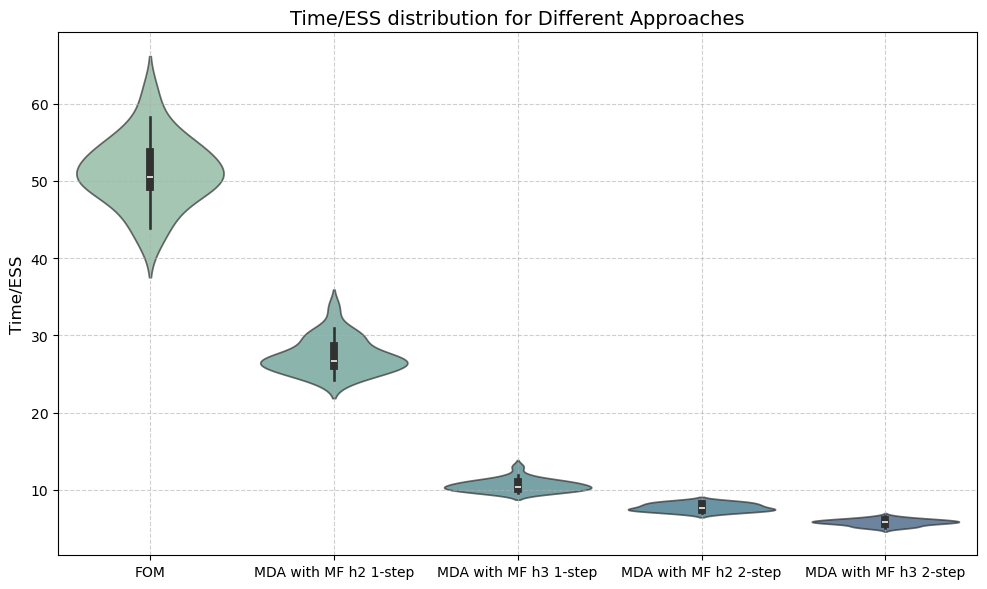

In [9]:
# Combine data into a single list
data = [Time_ESS_FOM_01,  Time_ESS_MDA_MF1step_h2_01,  Time_ESS_MDA_MF1step_h3_01, Time_ESS_MDA_MF2step_h2_01, Time_ESS_MDA_MF2step_h3_01]

# Labels for each dataset
labels = ['FOM',  'MDA with MF h2 1-step', 'MDA with MF h3 1-step', 'MDA with MF h2 2-step', 'MDA with MF h3 2-step']


# Set the color palette to "crest"
sns.set_palette("BuGn")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, palette="crest", alpha=0.7)

# Set title and labels
plt.title('Time/ESS distribution for Different Approaches', fontsize=14)
plt.ylabel('Time/ESS', fontsize=12)
plt.xticks(ticks=range(5), labels=labels, fontsize=10)
# plt.yscale('log')
# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()